In [1]:
# first we'll import all the modules necessary
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# next we'll give the initial training values to the model i.e. in x we'll give the number of rooms and y denotes the price
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([100, 195, 290, 385, 480, 600, 675, 805, 895])
# x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
# y = np.array([100, 200, 300, 400, 500, 600, 700, 800, 900])

The cost for w = 100 and b = 100 is:  5912.5


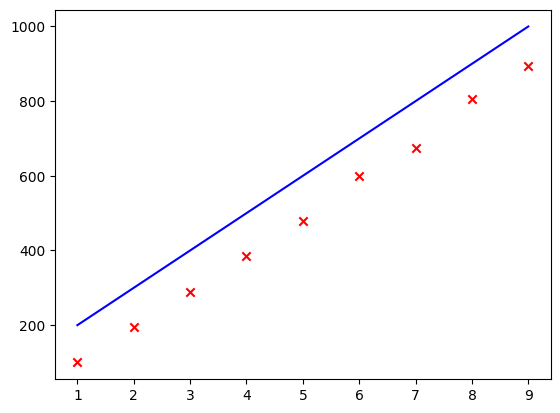

In [3]:
def compute_cost(x, y, w, b):
    total = 0
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w*x[i] + b
        sq = (f_wb[i] - y[i])**2
        total += sq
    total = (1/(2*m))*total
    return f_wb, total
# for the initial testing purpose without using the gradient descent we'll be using w = 100 and b = 100
# also we'll plot our predicted regression model and the existent data.
w = 100
b = 100
f, got = compute_cost(x, y, w, b)
print("The cost for w = 100 and b = 100 is: ", got)
plt.scatter(x, y, marker = 'x', c = 'r')
plt.plot(x, f, c = 'b')
plt.show()

In [4]:
'''since 5912.5 is a huge cost so in order to minimize it we'll be using the gradient descent function
   in order to find the values of w and b with significantly small cost function.'''
def gradient_function(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    m = x.shape[0]
    for i in range(m):
        f_wb = w*x[i] + b
        d_db = f_wb - y[i]
        d_dw = (f_wb - y[i])*x[i]
        dj_db += d_db
        dj_dw += d_dw
    dj_db = dj_db/m
    dj_dw = dj_dw/m
    return dj_db, dj_dw
def gradient_descent(x, y, w_in, b_in, gradient_function, iterations, alpha):
    w = w_in
    b = b_in
    for i in range(iterations):
        dj_db, dj_dw = gradient_function(x, y, w, b)
        b = b - (alpha*dj_db)
        w = w - (alpha*dj_dw)
    return b, w
w_init = 0
b_init = 0
alpha = 1.0e-2
iterations = 10000
b_final, w_final = gradient_descent(x, y, w_init, b_init, gradient_function, iterations, alpha)
print(f"Returned value of (b, w) is ({b_final:8.4f},{w_final:8.4f})")

Returned value of (b, w) is ( -7.9167, 99.9167)


The cost is:  44.42129629629642


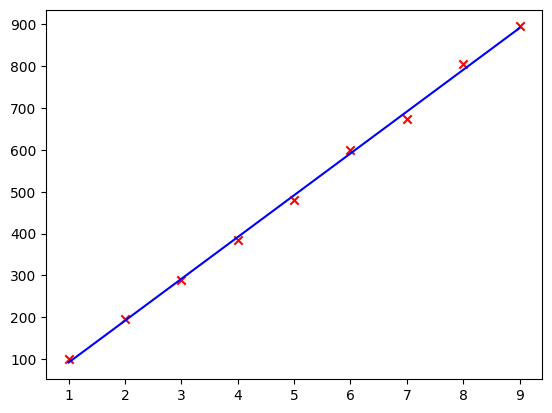

In [5]:
f, got = compute_cost(x, y, w_final, b_final)
print("The cost is: ", got)
plt.scatter(x, y, marker = 'x', c = 'r')
plt.plot(x, f, c = 'b')